**Neural Network From Scratch: Predicting World Population**

Import Necessary Package

In [ ]:
import requests as req
from bs4 import BeautifulSoup
import json
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

The dataset used is world population from 1950 until 2025, scrap it from [worldometers](https://www.worldometers.info/world-population/world-population-by-year/) website.

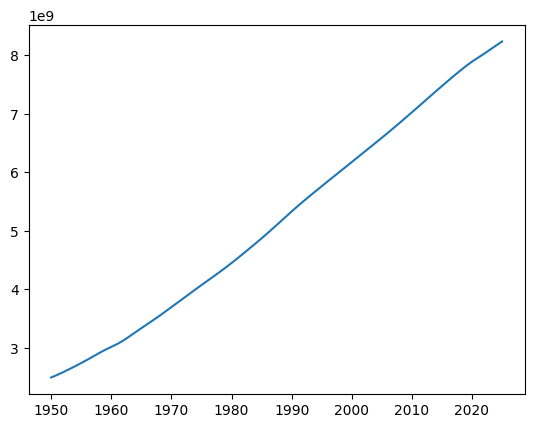

In [ ]:
url = "https://www.worldometers.info/world-population/world-population-by-year/"
x = req.get(url)

soup = BeautifulSoup(x.text, 'html.parser')

table = soup.find('tbody')
rows = table.find_all('tr')

raw = {}
for i in rows:
    cell = i.find_all('td')
    year = int(cell[0].text.strip())
    population = cell[1].text

    if year < 1950:
        continue

    raw[year] = int(population.replace(',',''))

rY = np.array(list(raw.values())[::-1])
rX = np.array(list(raw.keys())[::-1])

plt.plot(rX, rY)
plt.show()

The data above should be normalize because the gap between data is too large. The normalize means the large data will be converted to small number between 0 and 1, and we use MinMaxScaler to convert it.
The X (year) and Y (the world population) will be converted to number ranged from 0 and 1 like the graph below:

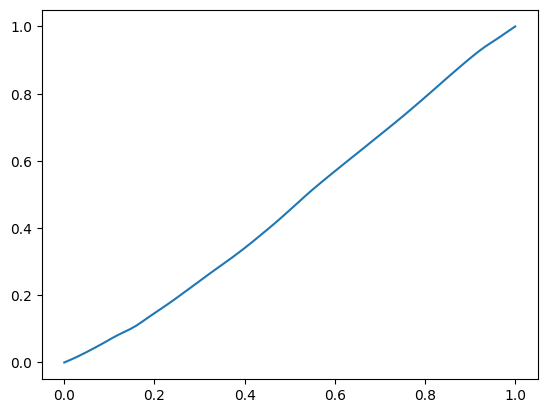

In [ ]:
rawY = rY.reshape((rY.shape[0],1))
scalerY = MinMaxScaler()
scalerY.fit(rawY)
rawY = scalerY.transform(rawY)
rawY = rawY.reshape((rawY.shape[0],))

rawX = rX.reshape((rX.shape[0],1))
scalerX = MinMaxScaler()
scalerX.fit(rawX)
rawX = scalerX.transform(rawX)
rawX = rawX.reshape((rawX.shape[0],))

plt.plot(rawX, rawY)
plt.show()

In [ ]:
print(f"X size: ",rX.shape)
print(f"Y size: ",rY.shape)
print(rawX)
print(rawY)

X size:  (76,)
Y size:  (76,)
[0.         0.01333333 0.02666667 0.04       0.05333333 0.06666667
 0.08       0.09333333 0.10666667 0.12       0.13333333 0.14666667
 0.16       0.17333333 0.18666667 0.2        0.21333333 0.22666667
 0.24       0.25333333 0.26666667 0.28       0.29333333 0.30666667
 0.32       0.33333333 0.34666667 0.36       0.37333333 0.38666667
 0.4        0.41333333 0.42666667 0.44       0.45333333 0.46666667
 0.48       0.49333333 0.50666667 0.52       0.53333333 0.54666667
 0.56       0.57333333 0.58666667 0.6        0.61333333 0.62666667
 0.64       0.65333333 0.66666667 0.68       0.69333333 0.70666667
 0.72       0.73333333 0.74666667 0.76       0.77333333 0.78666667
 0.8        0.81333333 0.82666667 0.84       0.85333333 0.86666667
 0.88       0.89333333 0.90666667 0.92       0.93333333 0.94666667
 0.96       0.97333333 0.98666667 1.        ]
[0.         0.00763859 0.01585661 0.02457313 0.03359786 0.04306353
 0.05268207 0.06265125 0.07286841 0.0824006  0.091030

The model used in this neural network is Linear Regression.
The neural network will be trained to determine the bias and weight that will be used to predicting.
Bias and weight initialize randomly, but in this code we set the initial value is 0.
The forward propagation will use the bias and weight to predict the Y value and calculate the loss value. We use MSE to calculate the loss value.
The backpropagation will use the loss value to recalculate and update the bias and weight value.
this events will be looped until certain cycle determined by you.

##########
Iteration: 1
Weight: 0
Bias: 0
MSE: 0.31407925600768816
Weight Slope: -0.6481890361334577
Bias Slope: -0.9382478446438838


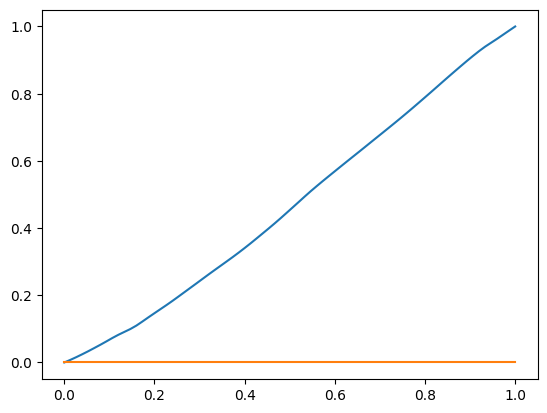

##########
Iteration: 2
Weight: 0.32409451806672884
Bias: 0.4691239223219419
MSE: 0.07121381475582855
Weight Slope: 0.038438318313269354
Bias Slope: 0.32409451806672984


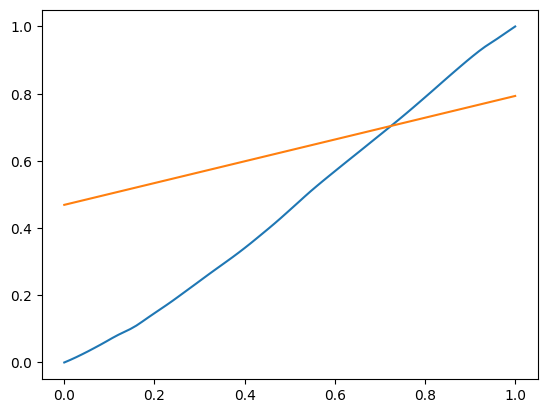

##########
Iteration: 3
Weight: 0.30487535891009415
Bias: 0.30707666328857697
MSE: 0.047454106695777785
Weight Slope: -0.13650713197632658
Bias Slope: -0.019219159156634788


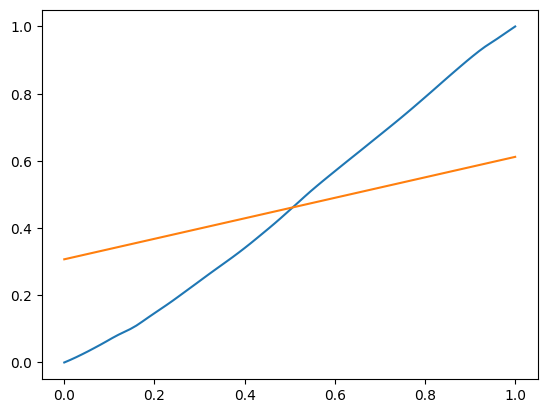

##########
Iteration: 4
Weight: 0.37312892489825744
Bias: 0.31668624286689434
MSE: 0.04026375429818337
Weight Slope: -0.08109182589039712
Bias Slope: 0.0682535659881635


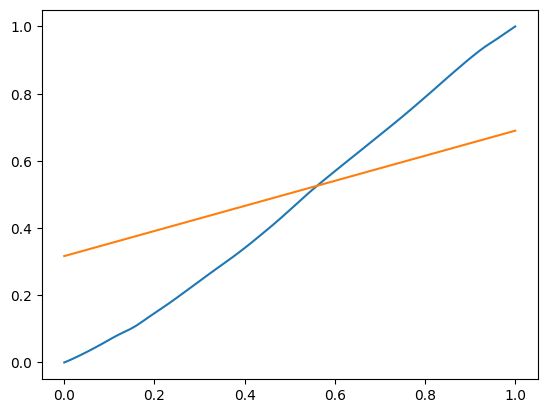

##########
Iteration: 5
Weight: 0.413674837843456
Bias: 0.2825594598728126
MSE: 0.034979116916362386
Weight Slope: -0.08800779619681225
Bias Slope: 0.04054591294519858


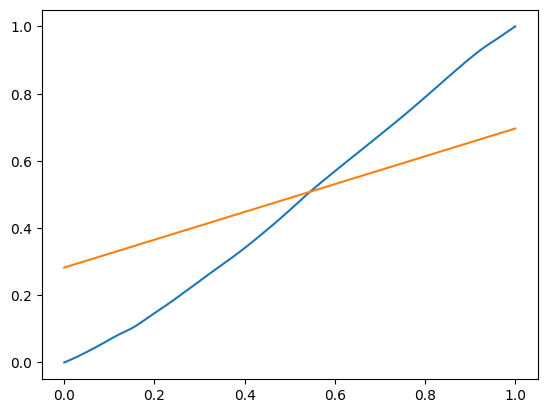

##########
Iteration: 6
Weight: 0.4576787359418621
Bias: 0.2622865034002133
MSE: 0.03045309961290807
Weight Slope: -0.07874924772337004
Bias Slope: 0.04400389809840629


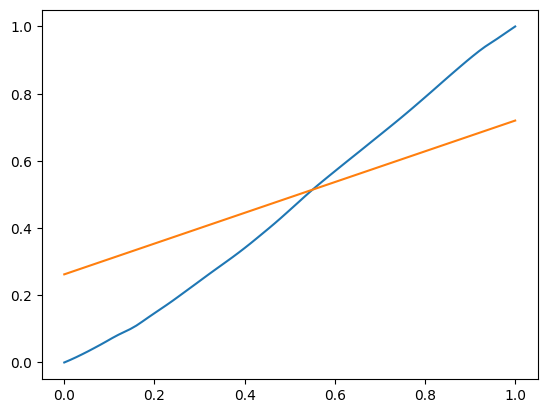

##########
Iteration: 7
Weight: 0.4970533598035471
Bias: 0.24028455435101018
MSE: 0.026522205622502154
Weight Slope: -0.07432644920317563
Bias Slope: 0.03937462386168519


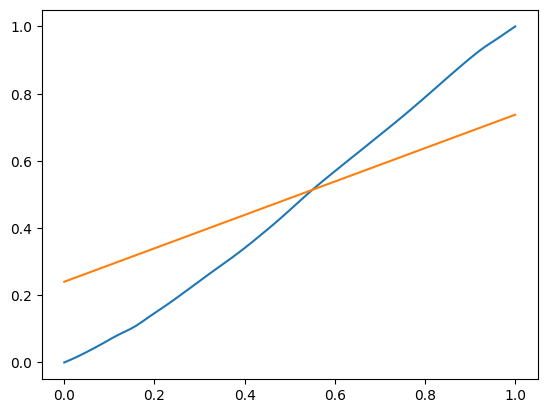

##########
Iteration: 8
Weight: 0.5342165844051349
Bias: 0.2205972424201676
MSE: 0.023104198394511874
Weight Slope: -0.06907310817917481
Bias Slope: 0.03716322460158785


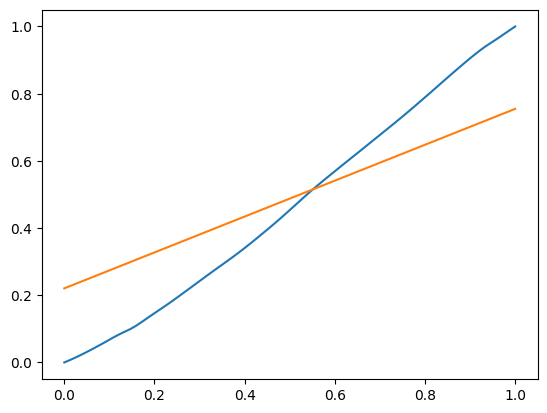

##########
Iteration: 9
Weight: 0.5687531384947223
Bias: 0.20201563011937368
MSE: 0.02013187188114148
Weight Slope: -0.06447685529095666
Bias Slope: 0.034536554089587675


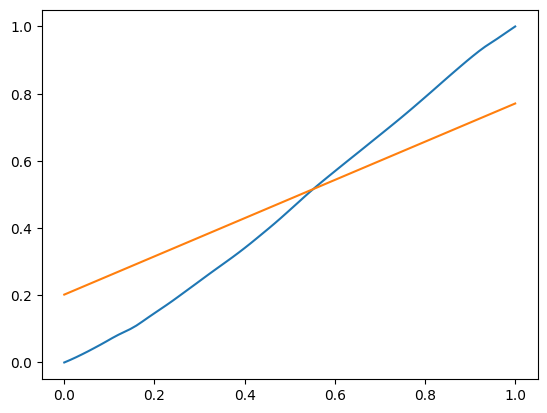

##########
Iteration: 10
Weight: 0.6009915661402007
Bias: 0.18474735307457985
MSE: 0.017547092285480615
Weight Slope: -0.0601095653381183
Bias Slope: 0.03223842764547843


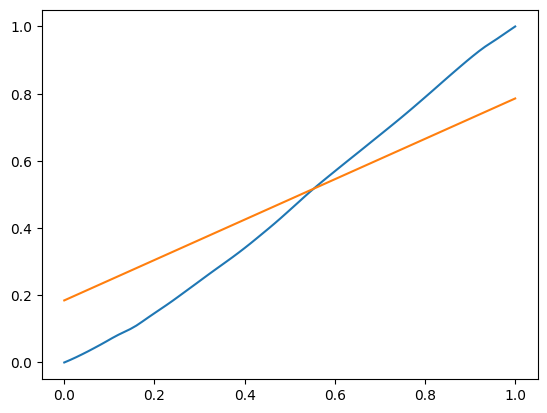

##########
Iteration: 11
Weight: 0.6310463488092598
Bias: 0.16862813925184064
MSE: 0.01529932780519669
Weight Slope: -0.05605868056962224
Bias Slope: 0.030054782669059227


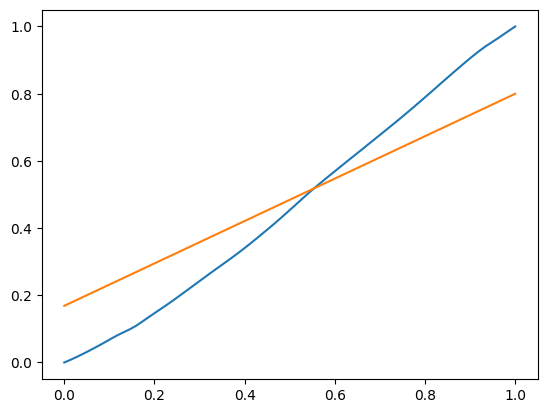

##########
Iteration: 12
Weight: 0.6590756890940709
Bias: 0.15360074791731104
MSE: 0.01334463679693482
Weight Slope: -0.05227527020190079
Bias Slope: 0.028029340284811233


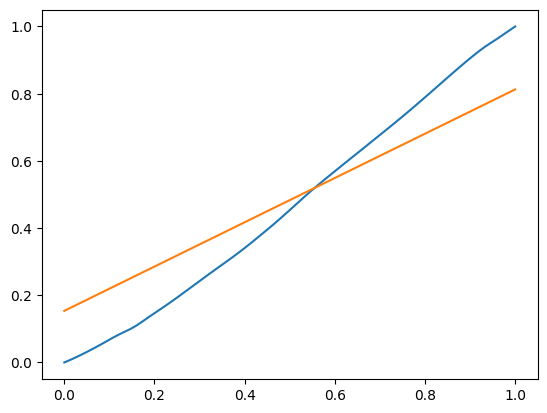

##########
Iteration: 13
Weight: 0.6852133241950212
Bias: 0.13958607777490542
MSE: 0.011644807037860541
Weight Slope: -0.04874868300989081
Bias Slope: 0.026137635100950397


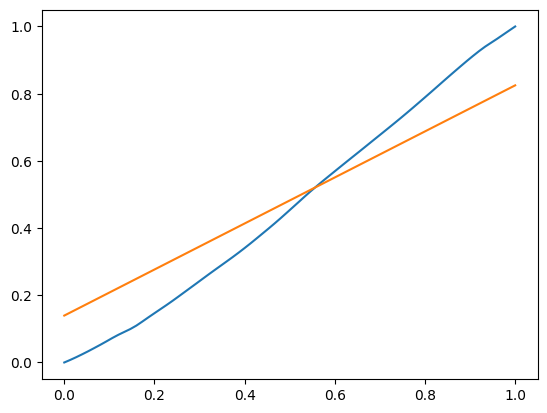

##########
Iteration: 14
Weight: 0.7095876656999667
Bias: 0.12651726022443022
MSE: 0.01016660859181632
Weight Slope: -0.045459609150380345
Bias Slope: 0.024374341504945586


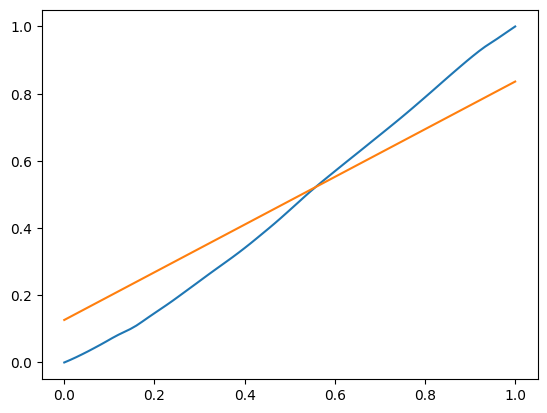

##########
Iteration: 15
Weight: 0.7323174702751568
Bias: 0.11433008947195743
MSE: 0.008881144189107711
Weight Slope: -0.04239255549905883
Bias Slope: 0.022729804575190228


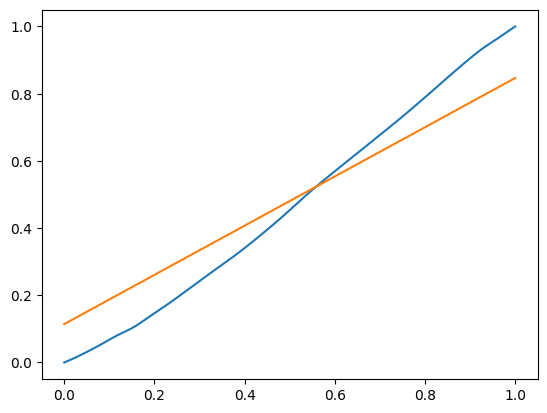

##########
Iteration: 16
Weight: 0.7535137480246862
Bias: 0.10296518718436232
MSE: 0.00776328431375931
Weight Slope: -0.039532400274747526
Bias Slope: 0.0211962777495294


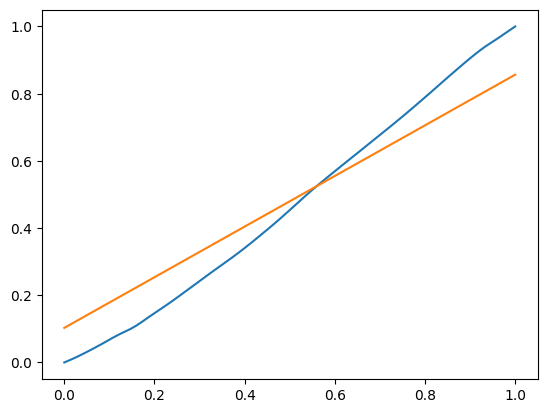

##########
Iteration: 17
Weight: 0.7732799481620599
Bias: 0.09236704830959762
MSE: 0.006791175947101196
Weight Slope: -0.03686522261287472
Bias Slope: 0.01976620013737382


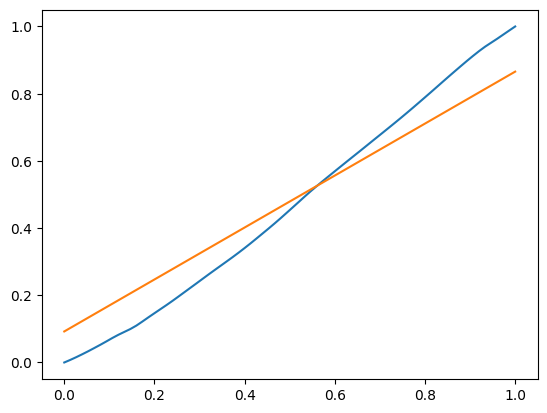

##########
Iteration: 18
Weight: 0.7917125594684973
Bias: 0.08248394824091071
MSE: 0.005945815363573504
Weight Slope: -0.034377992427019194
Bias Slope: 0.018432611306437405


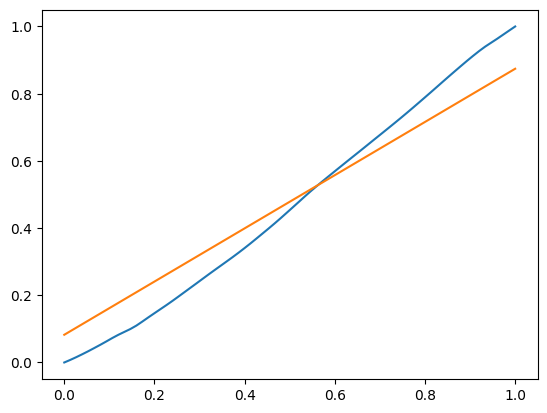

##########
Iteration: 19
Weight: 0.8089015556820068
Bias: 0.073267642587692
MSE: 0.005210676627303767
Weight Slope: -0.03205857173250477
Bias Slope: 0.017188996213509625


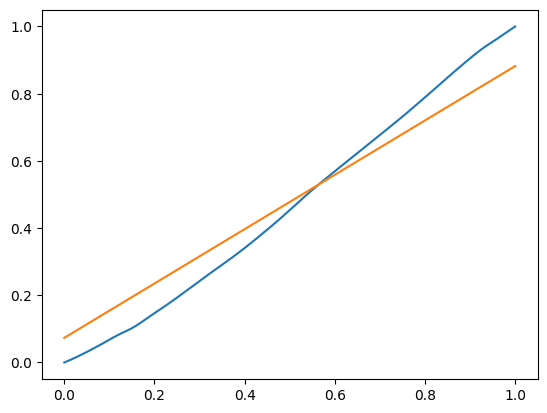

##########
Iteration: 20
Weight: 0.8249308415482592
Bias: 0.0646731444809372
MSE: 0.004571388526941849
Weight Slope: -0.029895637991241293
Bias Slope: 0.01602928586625249


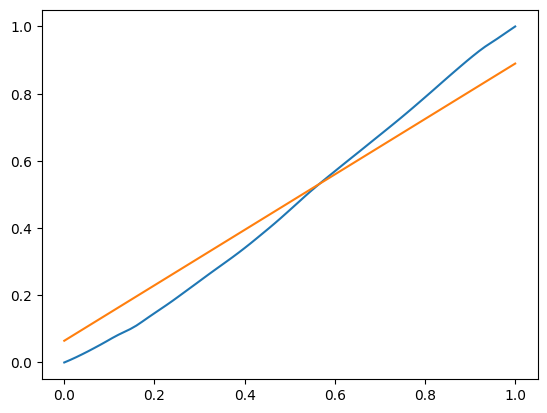

##########
Iteration: 21
Weight: 0.8398786605438799
Bias: 0.05665850154781095
MSE: 0.0040154536331582094
Weight Slope: -0.027878633509528752
Bias Slope: 0.014947818995620695


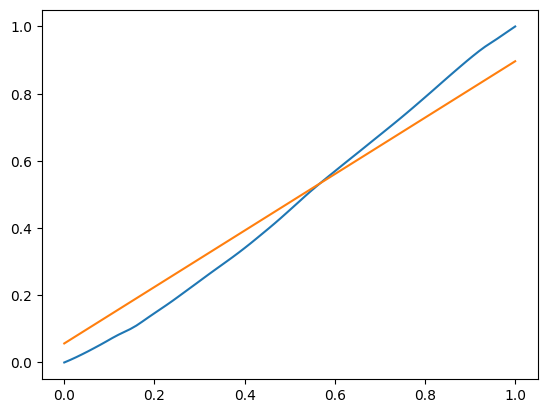

##########
Iteration: 22
Weight: 0.8538179772986443
Bias: 0.0491845920500006
MSE: 0.003532003986666658
Weight Slope: -0.02599771265191945
Bias Slope: 0.013939316754764374


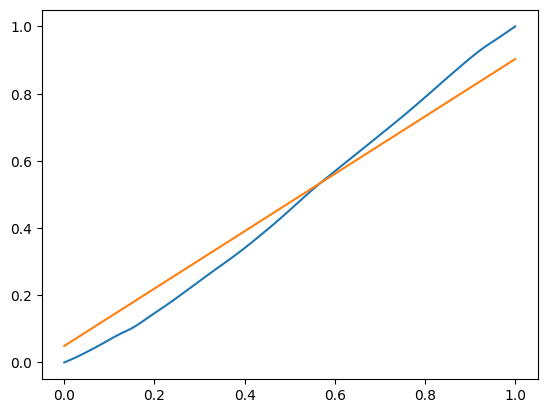

##########
Iteration: 23
Weight: 0.866816833624604
Bias: 0.042214933672618415
MSE: 0.003111588640721911
Weight Slope: -0.024243694117213044
Bias Slope: 0.012998856325959865


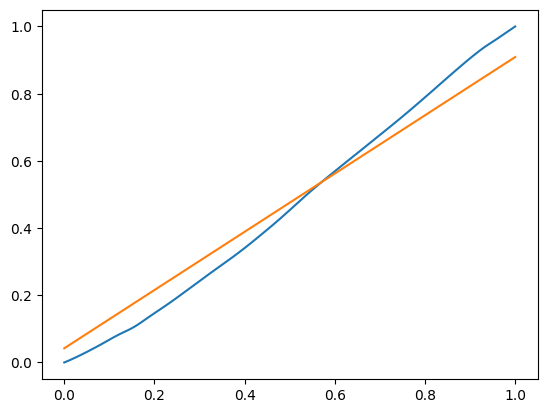

##########
Iteration: 24
Weight: 0.8789386806832106
Bias: 0.035715505509638486
MSE: 0.0027459889047648546
Weight Slope: -0.022608016031972544
Bias Slope: 0.012121847058606586


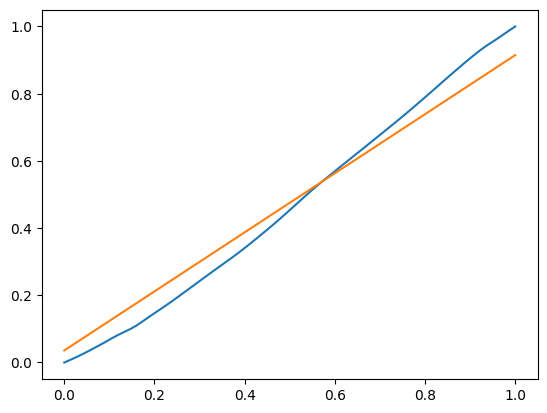

##########
Iteration: 25
Weight: 0.8902426886991969
Bias: 0.029654581980335194
MSE: 0.002428057677417521
Weight Slope: -0.021082694181658364
Bias Slope: 0.011304008015986352


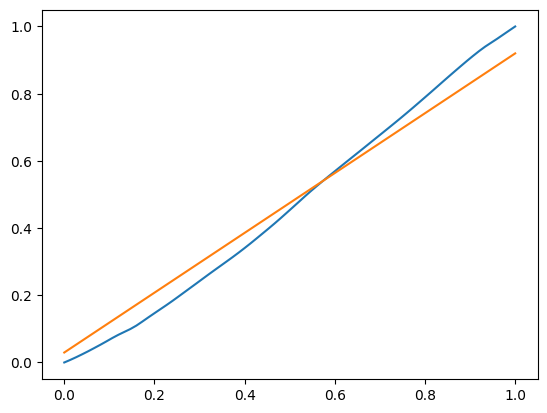

##########
Iteration: 26
Weight: 0.9007840357900261
Bias: 0.024002577972342017
MSE: 0.00215157972795189
Weight Slope: -0.01966028303091724
Bias Slope: 0.010541347090829253


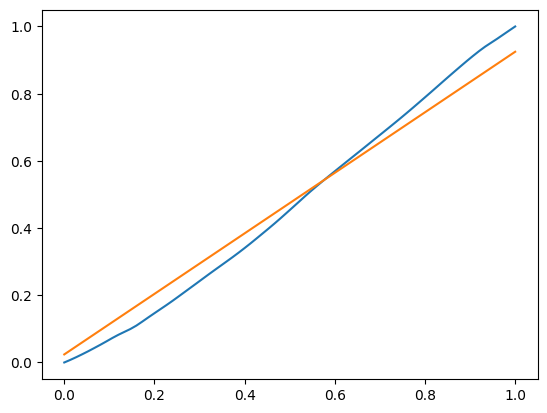

##########
Iteration: 27
Weight: 0.9106141773054847
Bias: 0.01873190442692739
MSE: 0.0019111501948780307
Weight Slope: -0.01833383938151301
Bias Slope: 0.00983014151545857


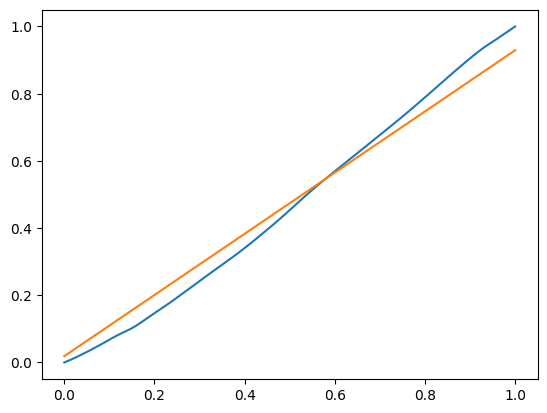

##########
Iteration: 28
Weight: 0.9197810969962412
Bias: 0.013816833669198104
MSE: 0.0017020689264230168
Weight Slope: -0.01709688848011236
Bias Slope: 0.009166919690756553


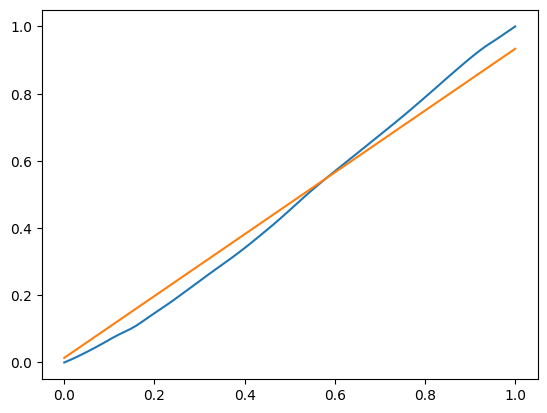

##########
Iteration: 29
Weight: 0.9283295412362974
Bias: 0.009233373823819828
MSE: 0.0015202485973649853
Weight Slope: -0.015943392413275102
Bias Slope: 0.008548444240056276


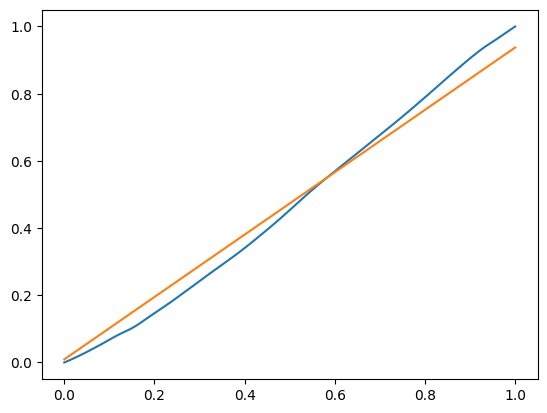

##########
Iteration: 30
Weight: 0.9363012374429349
Bias: 0.00495915170379169
MSE: 0.0013621348060002514
Weight Slope: -0.014867720634626509
Bias Slope: 0.007971696206637518


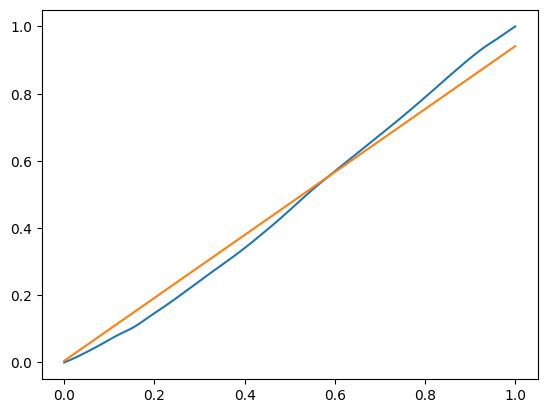

##########
Iteration: 31
Weight: 0.9437350977602482
Bias: 0.0009733036004729309
MSE: 0.0012246365892208068
Weight Slope: -0.013864622480548294
Bias Slope: 0.007433860317313357


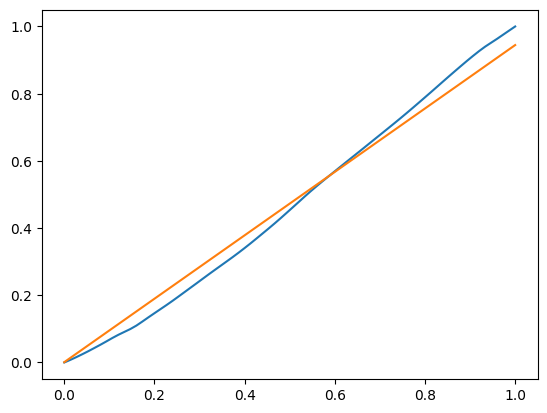

##########
Iteration: 32
Weight: 0.9506674090005224
Bias: -0.0027436265581837474
MSE: 0.0011050659973429924
Weight Slope: -0.012929201540176549
Bias Slope: 0.006932311240274164


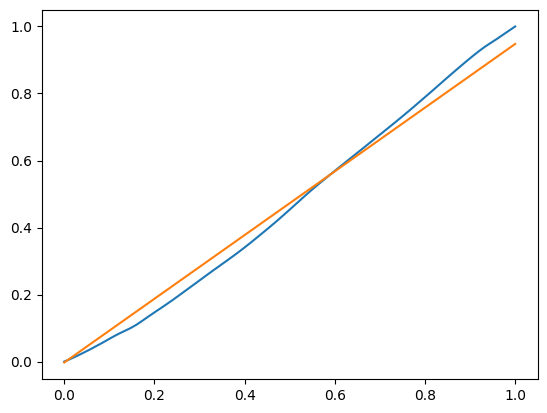

##########
Iteration: 33
Weight: 0.9571320097706106
Bias: -0.006209782178320829
MSE: 0.0010010855474369038
Weight Slope: -0.012056891754609942
Bias Slope: 0.006464600770088269


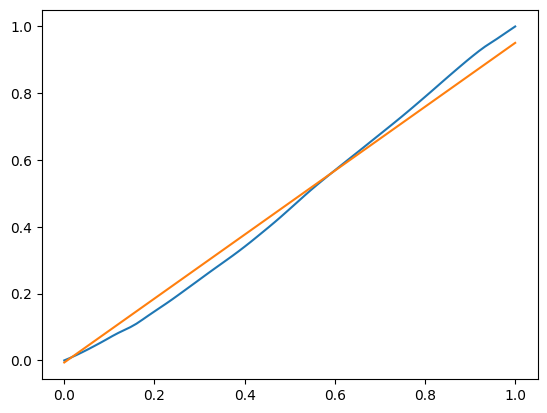

##########
Iteration: 34
Weight: 0.9631604556479156
Bias: -0.009442082563364963
MSE: 0.0009106625279228719
Weight Slope: -0.01124343512866274
Bias Slope: 0.0060284458773049885


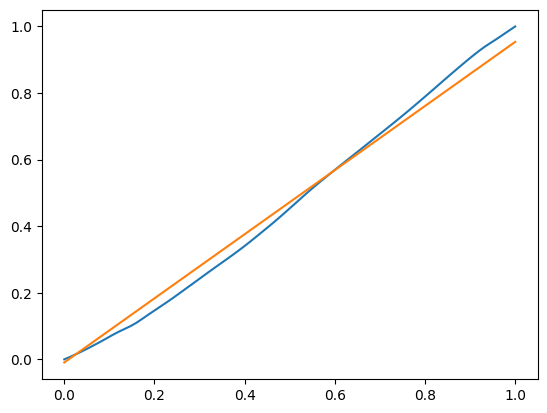

##########
Iteration: 35
Weight: 0.968782173212247
Bias: -0.012456305502017458
MSE: 0.0008320292611364707
Weight Slope: -0.010484860946363951
Bias Slope: 0.005621717564331394


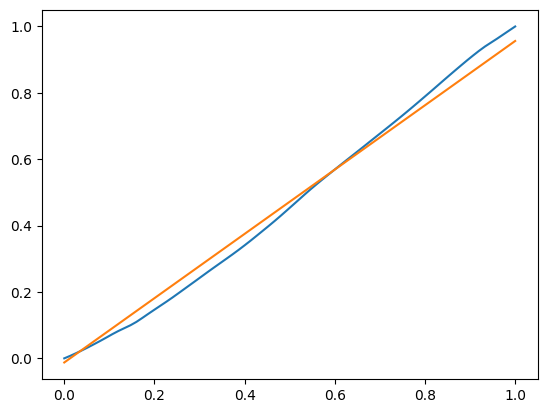

##########
Iteration: 36
Weight: 0.974024603685429
Bias: -0.015267164284183156
MSE: 0.0007636485470358809
Weight Slope: -0.009777466388749744
Bias Slope: 0.005242430473181973


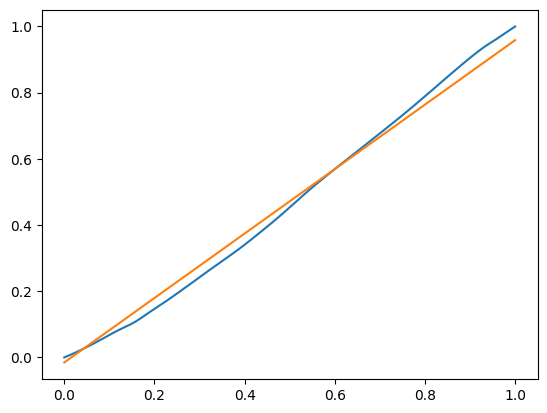

##########
Iteration: 37
Weight: 0.9789133368798039
Bias: -0.017888379520774142
MSE: 0.0007041836125113062
Weight Slope: -0.009117798459338012
Bias Slope: 0.004888733194374928


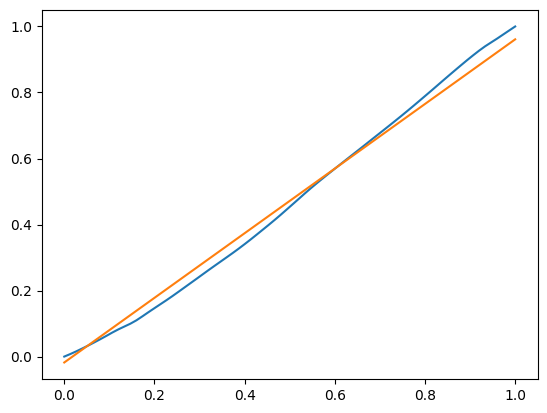

##########
Iteration: 38
Weight: 0.9834722361094729
Bias: -0.020332746117961605
MSE: 0.0006524719788362012
Weight Slope: -0.00850263712905873
Bias Slope: 0.004558899229669005


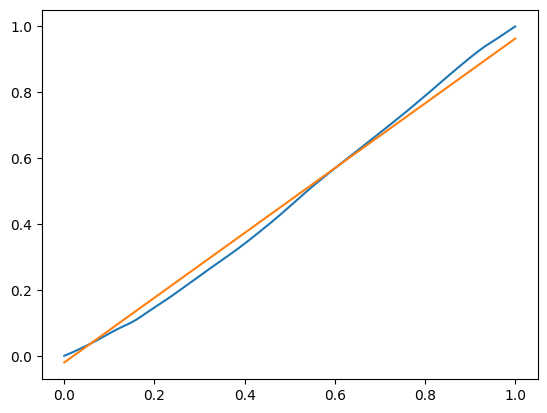

##########
Iteration: 39
Weight: 0.9877235546740022
Bias: -0.022612195732796107
MSE: 0.0006075027363956284
Weight Slope: -0.00792897961836467
Bias Slope: 0.0042513185645293135


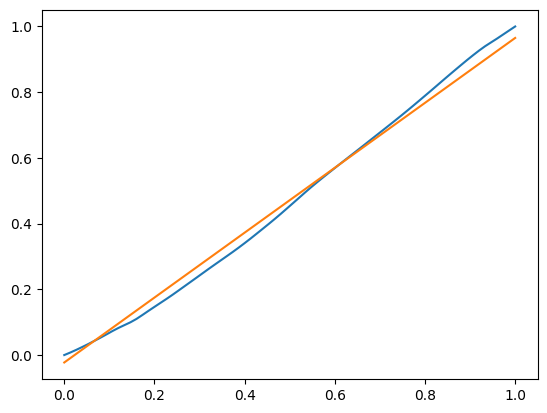

##########
Iteration: 40
Weight: 0.9916880444831845
Bias: -0.024737855015060765
MSE: 0.0005683967824359385
Weight Slope: -0.007394025739800278
Bias Slope: 0.003964489809182356


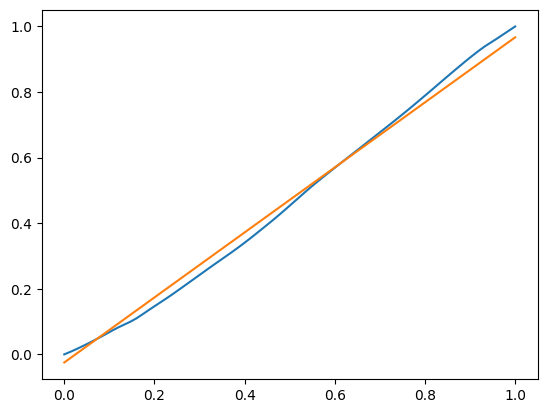

##########
Iteration: 41
Weight: 0.9953850573530846
Bias: -0.026720099919651942
MSE: 0.0005343896355039371
Weight Slope: -0.006895164229480742
Bias Slope: 0.0036970128699000755


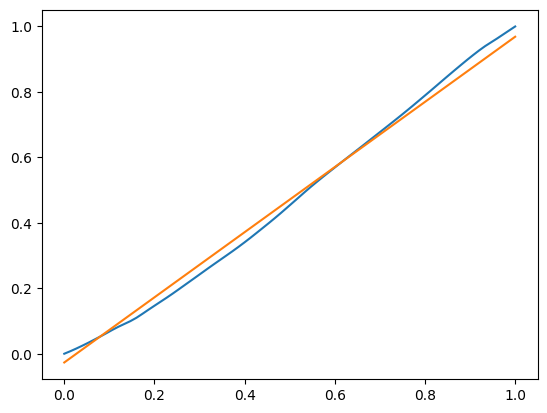

##########
Iteration: 42
Weight: 0.998832639467825
Bias: -0.02856860635460198
MSE: 0.000504816490615391
Weight Slope: -0.006429960000760553
Bias Slope: 0.003447582114740403


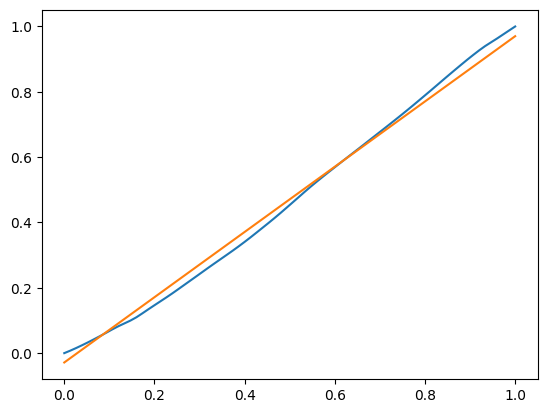

##########
Iteration: 43
Weight: 1.0020476194682053
Bias: -0.03029239741197218
MSE: 0.00047909922299668343
Weight Slope: -0.005996142257875502
Bias Slope: 0.003214980000380344


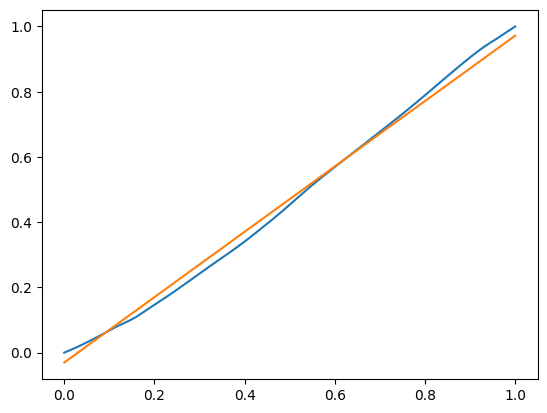

##########
Iteration: 44
Weight: 1.005045690597143
Bias: -0.031899887412162355
MSE: 0.00045673508633604877
Weight Slope: -0.005591593411534115
Bias Slope: 0.002998071128937755


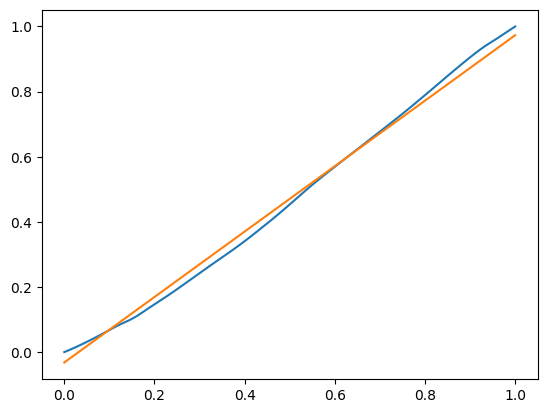

##########
Iteration: 45
Weight: 1.00784148730291
Bias: -0.03339892297663123
MSE: 0.00043728688460673015
Weight Slope: -0.005214338742354946
Bias Slope: 0.0027957967057669736


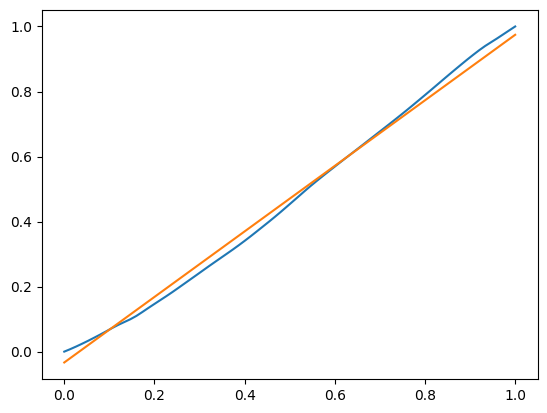

##########
Iteration: 46
Weight: 1.0104486566740876
Bias: -0.03479682132951472
MSE: 0.0004203744253312448
Weight Slope: -0.004862536761692546
Bias Slope: 0.0026071693711776293


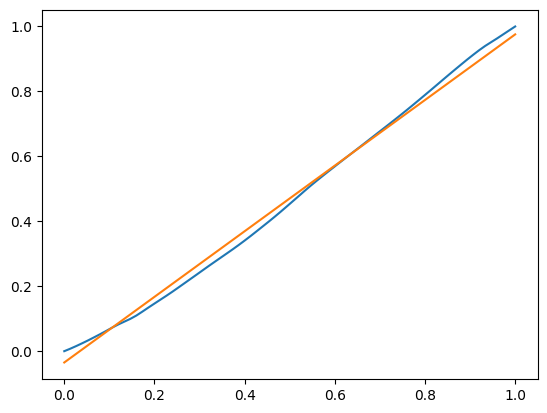

##########
Iteration: 47
Weight: 1.0128799250549338
Bias: -0.03610040601510353
MSE: 0.00040566708720683324
Weight Slope: -0.004534470222802349
Bias Slope: 0.0024312683808462242


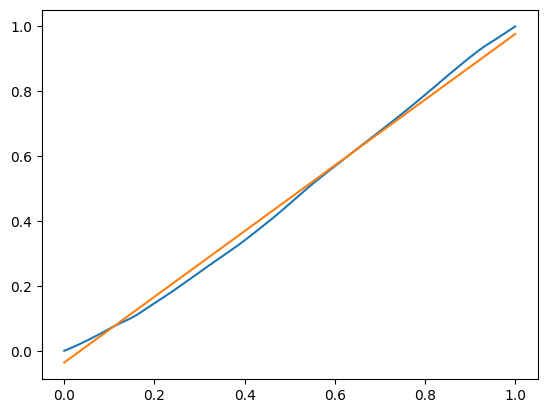

##########
Iteration: 48
Weight: 1.015147160166335
Bias: -0.037316040205526646
MSE: 0.0003928773567966988
Weight Slope: -0.004228537738462802
Bias Slope: 0.002267235111401308


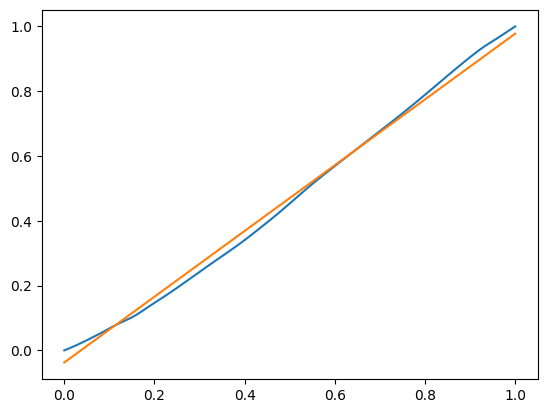

##########
Iteration: 49
Weight: 1.0172614290355666
Bias: -0.0384496577612273
MSE: 0.00038175520793603136
Weight Slope: -0.003943245964145911
Bias Slope: 0.002114268869231448


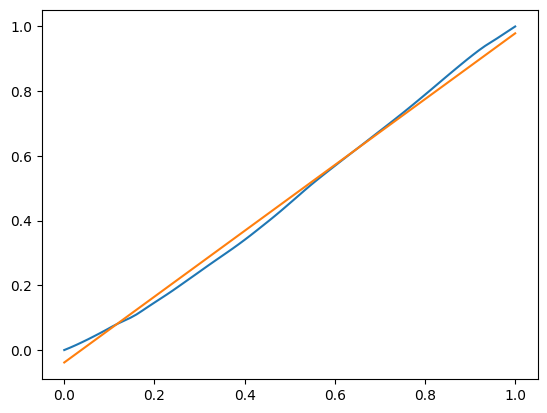

##########
Iteration: 50
Weight: 1.0192330520176396
Bias: -0.03950679219584303
MSE: 0.00037208321397587353
Weight Slope: -0.003677202308570433
Bias Slope: 0.0019716229820729903


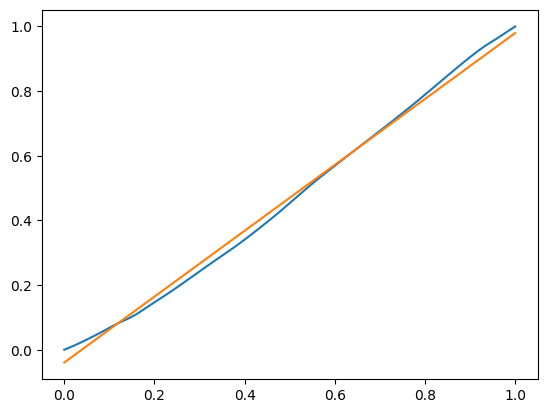

##########
Iteration: 51
Weight: 1.0210716531719248
Bias: -0.04049260368687952
MSE: 0.0003636722973142429
Weight Slope: -0.0034291081360643834
Bias Slope: 0.0018386011542852508


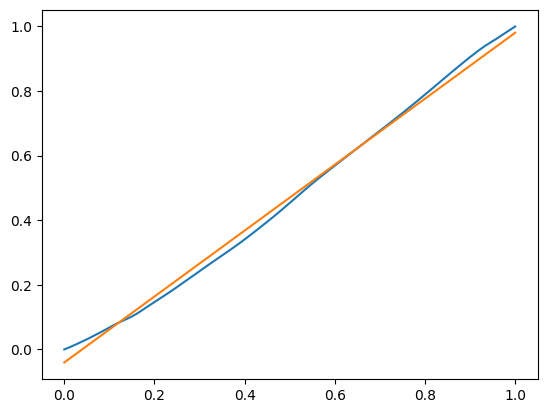

##########
Iteration: 52
Weight: 1.022786207239957
Bias: -0.041411904264022144
MSE: 0.00035635803312215317
Weight Slope: -0.003197752427549907
Bias Slope: 0.001714554068032119


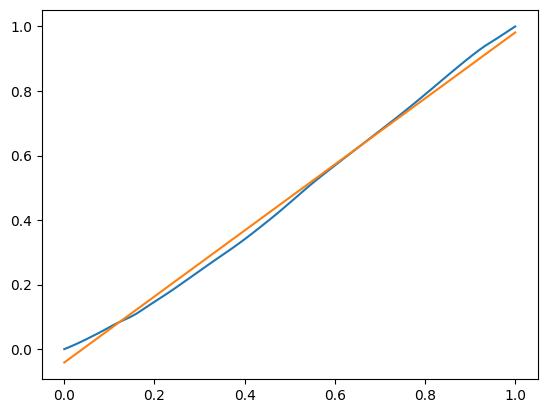

##########
Iteration: 53
Weight: 1.0243850834537318
Bias: -0.0422691812980382
MSE: 0.00034999743500616586
Weight Slope: -0.0029820058692103892
Bias Slope: 0.0015988762137748623


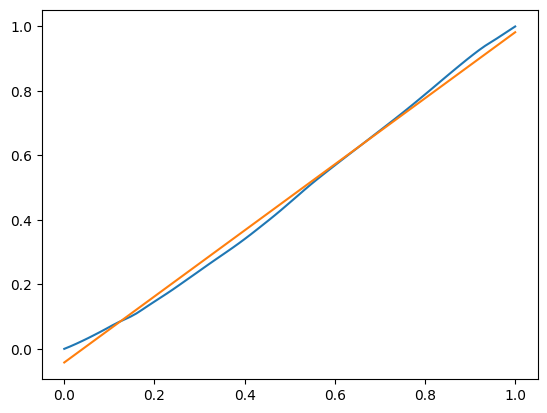

##########
Iteration: 54
Weight: 1.025876086388337
Bias: -0.04306861940492563
MSE: 0.0003444661597704623
Weight Slope: -0.0027808153399850226
Bias Slope: 0.0014910029346051666


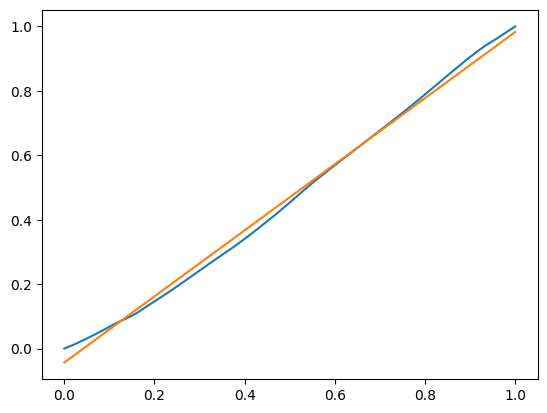

##########
Iteration: 55
Weight: 1.0272664940583294
Bias: -0.04381412087222821
MSE: 0.00033965607663438024
Weight Slope: -0.0025931987709815717
Bias Slope: 0.0013904076699924372


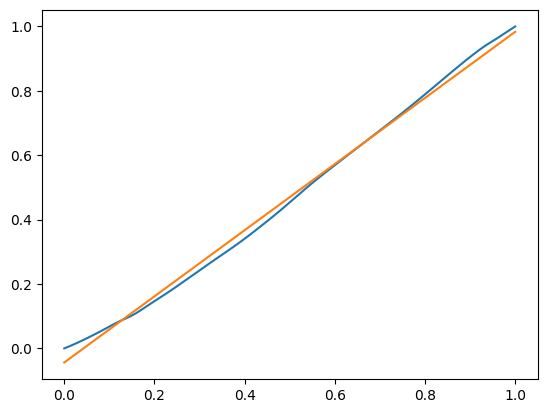

##########
Iteration: 56
Weight: 1.0285630934438201
Bias: -0.04450932470722443
MSE: 0.0003354731533861069
Weight Slope: -0.002418240351715094
Bias Slope: 0.001296599385490773


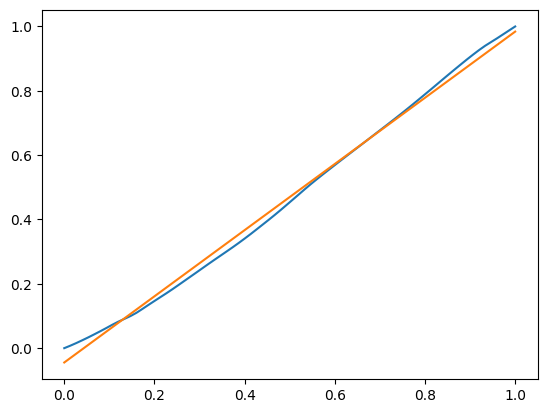

##########
Iteration: 57
Weight: 1.0297722136196776
Bias: -0.045157624399969815
MSE: 0.0003318356181489931
Weight Slope: -0.0022550860597738884
Bias Slope: 0.0012091201758575032


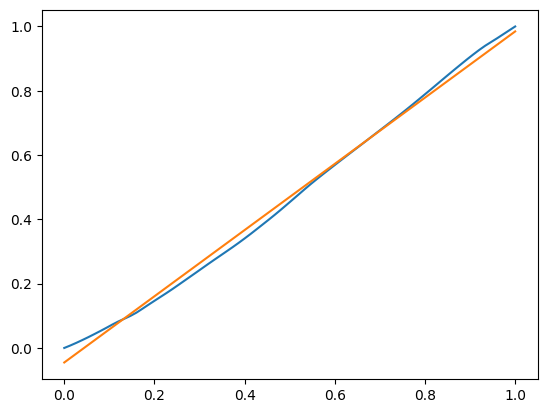

##########
Iteration: 58
Weight: 1.0308997566495646
Bias: -0.045762184487898566
MSE: 0.00032867236082489407
Weight Slope: -0.002102939492089627
Bias Slope: 0.0011275430298869407


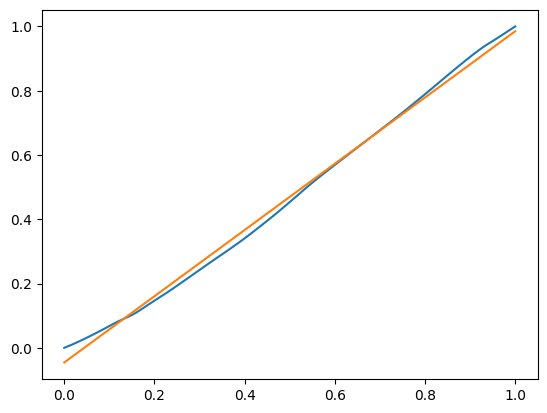

##########
Iteration: 59
Weight: 1.0319512263956094
Bias: -0.046325956002842034
MSE: 0.0003259215429643899
Weight Slope: -0.0019610579774652095
Bias Slope: 0.00105146974604487


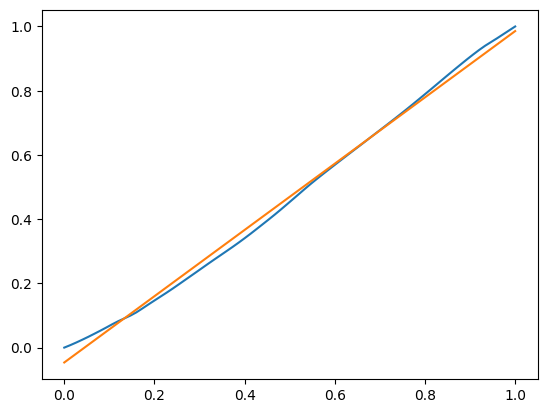

##########
Iteration: 60
Weight: 1.032931755384342
Bias: -0.046851690875864466
MSE: 0.00032352938888826764
Weight Slope: -0.0018287489513826667
Bias Slope: 0.0009805289887325837


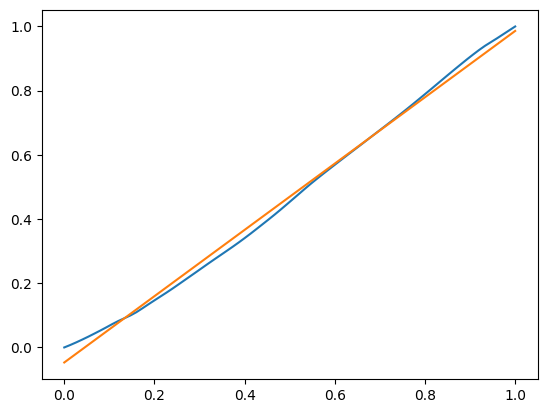

##########
Iteration: 61
Weight: 1.0338461298600334
Bias: -0.04734195537023076
MSE: 0.00032144913442792253
Weight Slope: -0.0017053665753960369
Bias Slope: 0.0009143744756914335


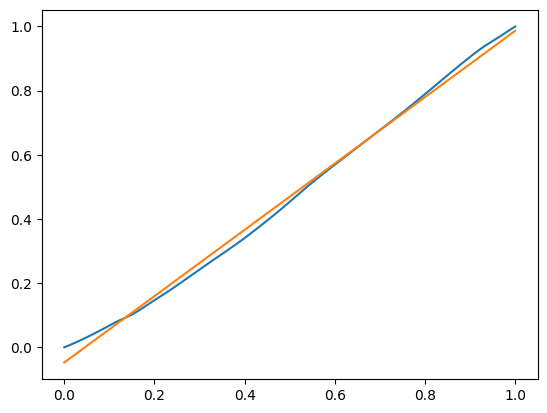

##########
Iteration: 62
Weight: 1.0346988131477315
Bias: -0.04779914260807648
MSE: 0.0003196401127336346
Weight Slope: -0.001590308584608836
Bias Slope: 0.0008526832876980542


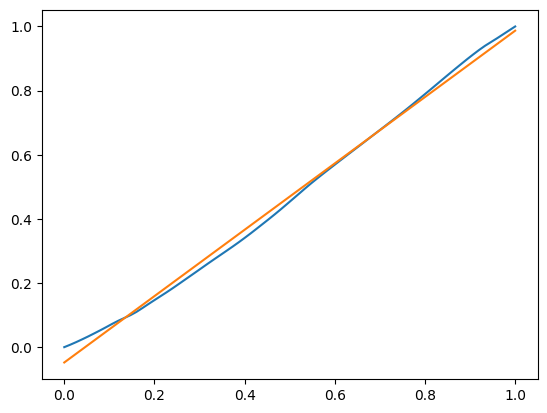

##########
Iteration: 63
Weight: 1.0354939674400359
Bias: -0.04822548425192551
MSE: 0.0003180669592791956
Weight Slope: -0.0014830133478447082
Bias Slope: 0.0007951542923043763


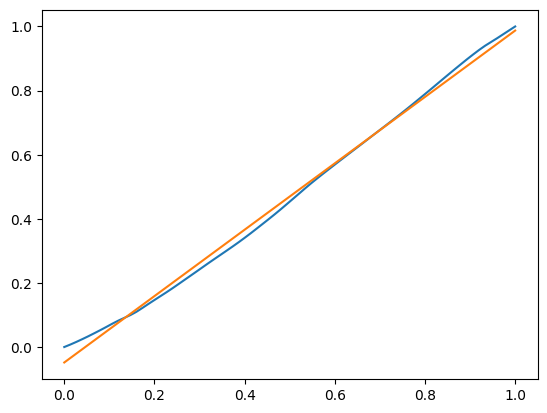

##########
Iteration: 64
Weight: 1.036235474113958
Bias: -0.0486230613980777
MSE: 0.0003166989205215468
Weight Slope: -0.0013829571261646315
Bias Slope: 0.0007415066739222454


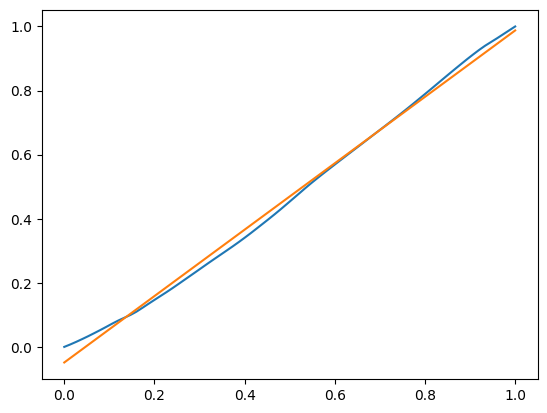

##########
Iteration: 65
Weight: 1.0369269526770404
Bias: -0.04899381473503882
MSE: 0.0003155092527004266
Weight Slope: -0.0012896515163460965
Bias Slope: 0.000691478563082272


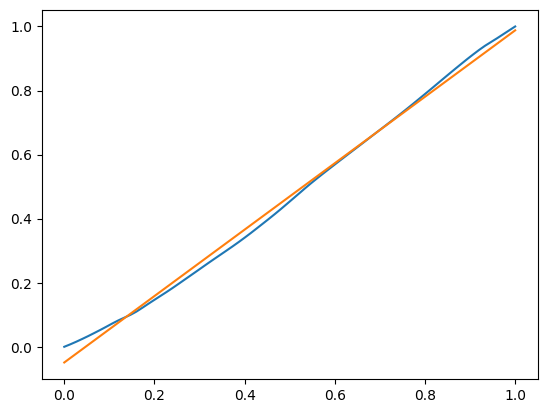

##########
Iteration: 66
Weight: 1.0375717784352134
Bias: -0.04933955401657995
MSE: 0.00031447469902517804
Weight Slope: -0.0012026410668466582
Bias Slope: 0.0006448257581730501


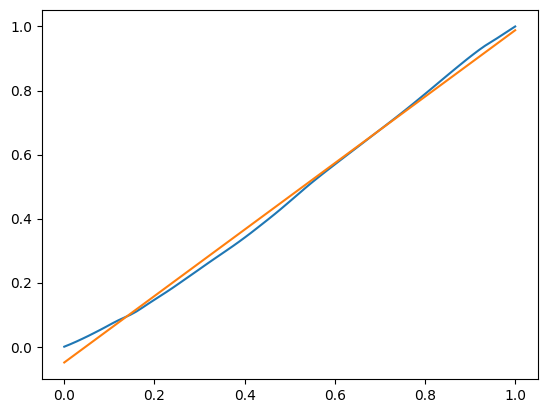

##########
Iteration: 67
Weight: 1.0381730989686369
Bias: -0.04966196689566648
MSE: 0.0003135750350282453
Weight Slope: -0.0011215010546134488
Bias Slope: 0.0006013205334234328


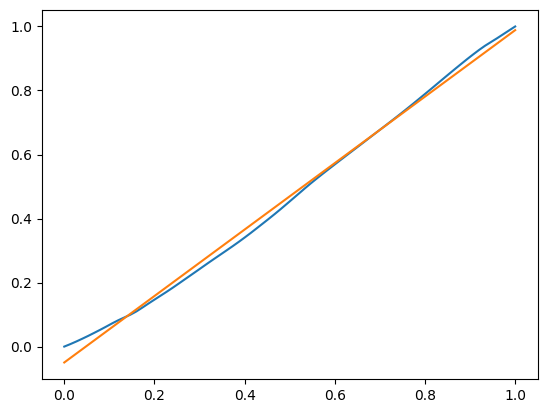

##########
Iteration: 68
Weight: 1.0387338494959435
Bias: -0.0499626271623782
MSE: 0.00031279267319749606
Weight Slope: -0.0010458354118882567
Bias Slope: 0.0005607505273066562


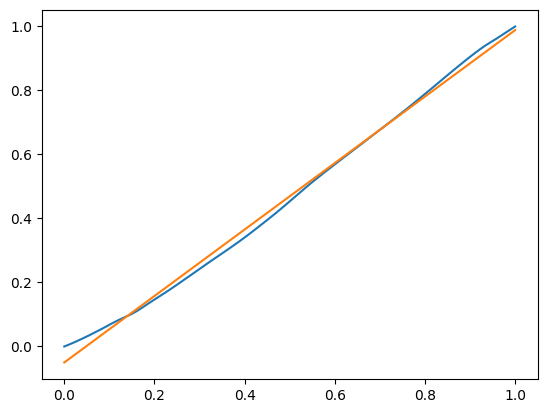

##########
Iteration: 69
Weight: 1.0392567672018875
Bias: -0.050243002426031524
MSE: 0.0003121123191583208
Weight Slope: -0.000975274792885807
Bias Slope: 0.0005229177059440429


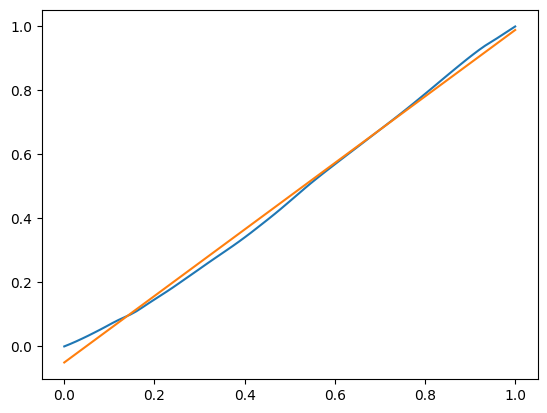

##########
Iteration: 70
Weight: 1.0397444045983304
Bias: -0.05050446127900354
MSE: 0.0003115206726842344
Weight Slope: -0.0009094747709117358
Bias Slope: 0.00048763739644285496


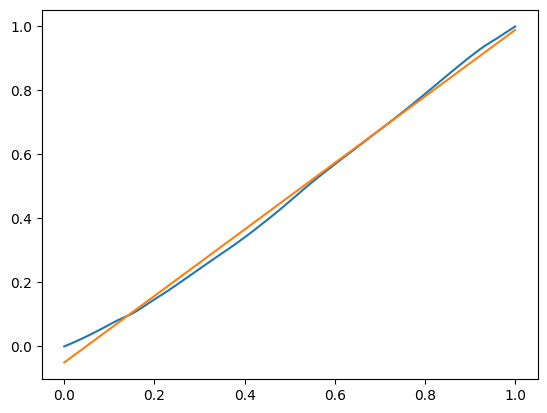

##########
Iteration: 71
Weight: 1.0401991419837862
Bias: -0.05074827997722497
MSE: 0.00031100616769103625
Weight Slope: -0.0008481141571161769
Bias Slope: 0.00045473738545577584


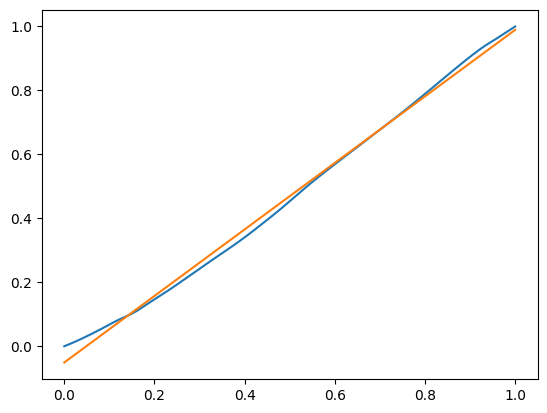

##########
Iteration: 72
Weight: 1.0406231990623442
Bias: -0.050975648669952855
MSE: 0.00031055874613167506
Weight Slope: -0.0007908934326784114
Bias Slope: 0.0004240570785580924


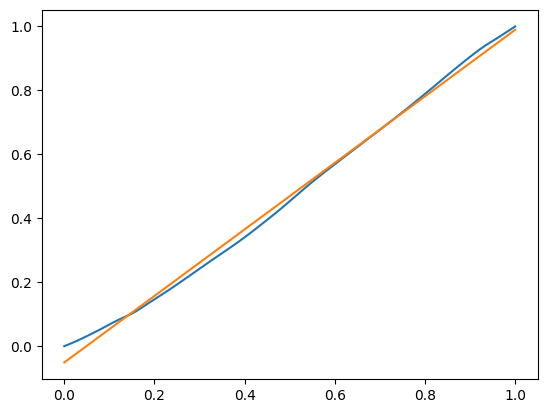

##########
Iteration: 73
Weight: 1.0410186457786834
Bias: -0.051187677209231904
MSE: 0.0003101696613717068
Weight Slope: -0.000737533286769829
Bias Slope: 0.00039544671633918495


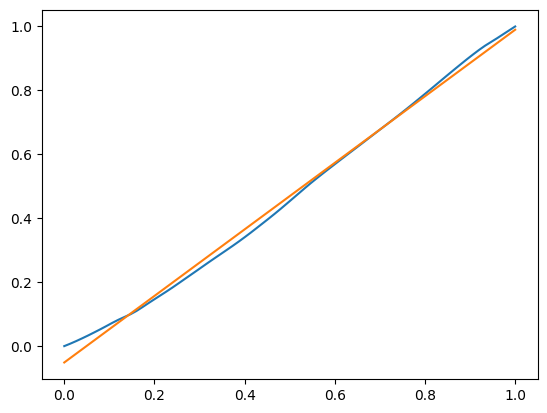

##########
Iteration: 74
Weight: 1.0413874124220683
Bias: -0.0513854005674015
MSE: 0.000309831307201524
Weight Slope: -0.0006877732531566384
Bias Slope: 0.00036876664338494024


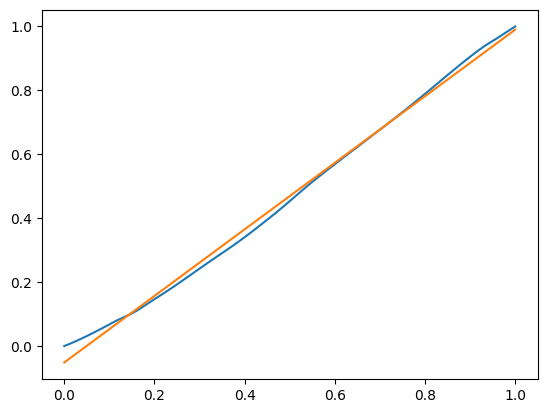

##########
Iteration: 75
Weight: 1.0417312990486467
Bias: -0.051569783889093966
MSE: 0.0003095370691427278
Weight Slope: -0.0006413704387898567
Bias Slope: 0.00034388662657835144


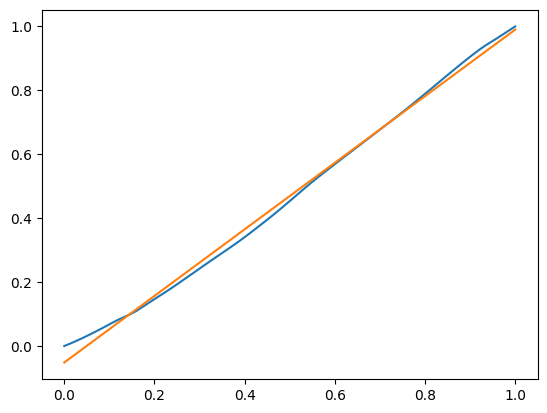

##########
Iteration: 76
Weight: 1.0420519842680416
Bias: -0.05174172720238314
MSE: 0.00030928119514183374
Weight Slope: -0.0005980983381740399
Bias Slope: 0.00032068521939487106


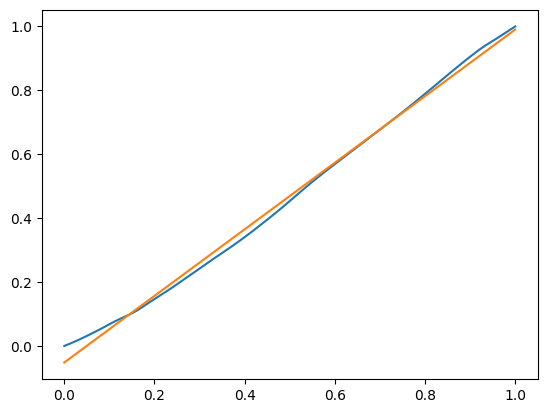

##########
Iteration: 77
Weight: 1.0423510334371286
Bias: -0.05190206981208057
MSE: 0.000309058683123498
Weight Slope: -0.0005577457277285883
Bias Slope: 0.0002990491690870792


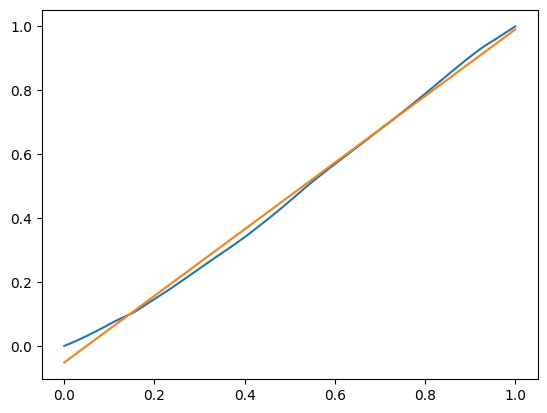

##########
Iteration: 78
Weight: 1.042629906300993
Bias: -0.05205159439662411
MSE: 0.0003088651832050594
Weight Slope: -0.0005201156347454102
Bias Slope: 0.0002788728638643165


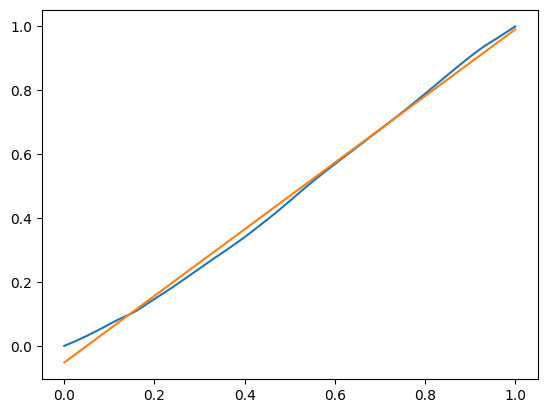

##########
Iteration: 79
Weight: 1.0428899641183655
Bias: -0.052191030828556265
MSE: 0.00030869691266077184
Weight Slope: -0.0004850243759075081
Bias Slope: 0.00026005781737260743


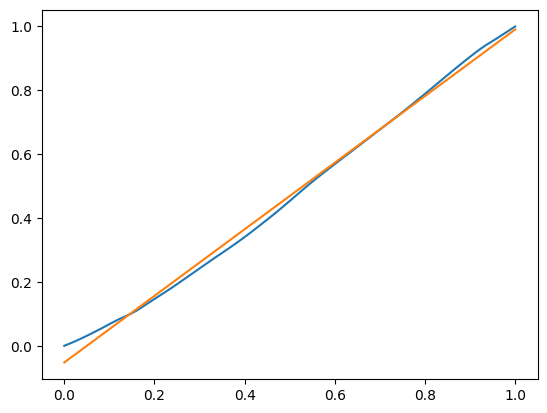

##########
Iteration: 80
Weight: 1.0431324763063192
Bias: -0.05232105973724257
MSE: 0.0003085505819733832
Weight Slope: -0.0004523006606782208
Bias Slope: 0.0002425121879536909


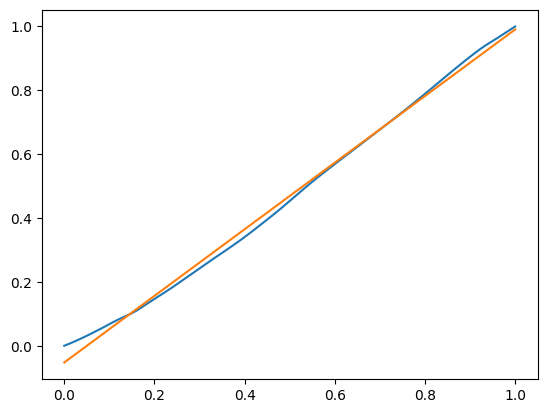

##########
Iteration: 81
Weight: 1.0433586266366583
Bias: -0.052442315831219416
MSE: 0.0003084233305274316
Weight Slope: -0.0004217847551830316
Bias Slope: 0.00022615033033913132


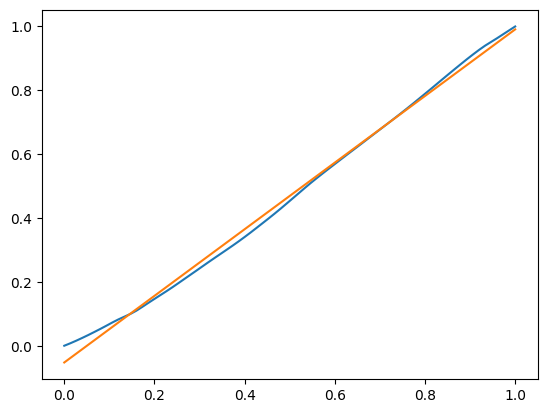

##########
Iteration: 82
Weight: 1.0435695190142498
Bias: -0.05255539099638898
MSE: 0.00030831267068713613
Weight Slope: -0.00039332770250235605
Bias Slope: 0.0002108923775914148


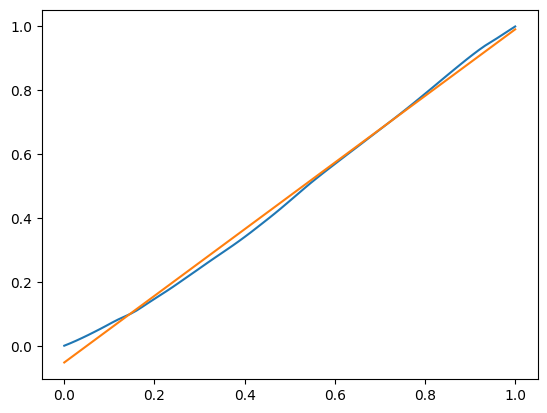

##########
Iteration: 83
Weight: 1.043766182865501
Bias: -0.05266083718518469
MSE: 0.0003082164391656575
Weight Slope: -0.00036679059556950715
Bias Slope: 0.00019666385125115553


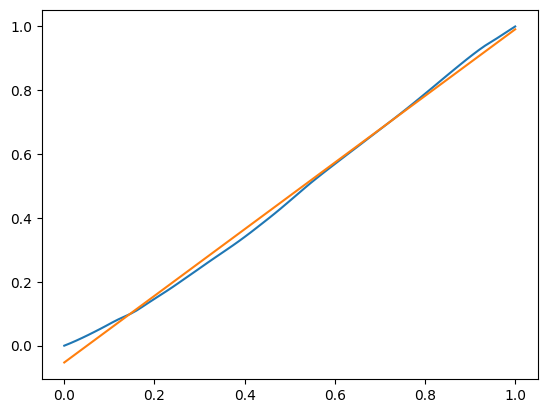

##########
Iteration: 84
Weight: 1.0439495781632857
Bias: -0.052759169110810265
MSE: 0.00030813275473505226
Weight Slope: -0.00034204389912619076
Bias Slope: 0.00018339529778478507


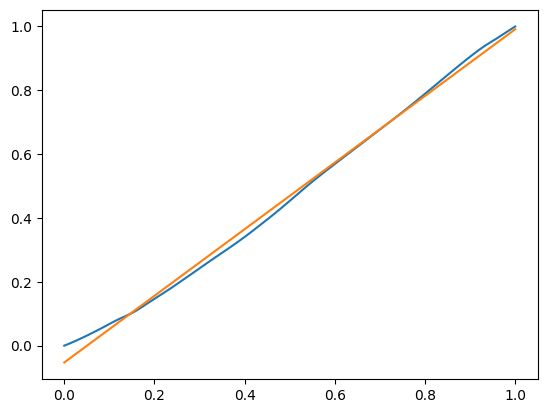

##########
Iteration: 85
Weight: 1.044120600112849
Bias: -0.05285086675970266
MSE: 0.0003080599814501845
Weight Slope: -0.00031896681742283424
Bias Slope: 0.00017102194956319415


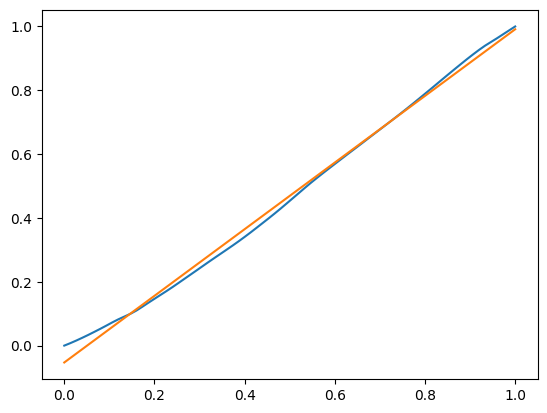

##########
Iteration: 86
Weight: 1.0442800835215604
Bias: -0.05293637773448426
MSE: 0.00030799669666767385
Weight Slope: -0.00029744670458025117
Bias Slope: 0.0001594834087115249


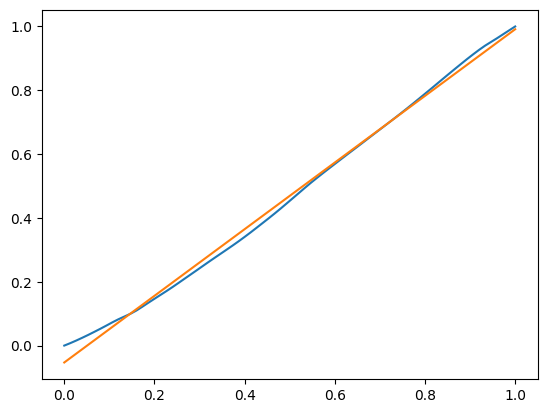

##########
Iteration: 87
Weight: 1.0444288068738505
Bias: -0.05301611943884002
MSE: 0.00030794166323466716
Weight Slope: -0.0002773785147324341
Bias Slope: 0.00014872335229011054


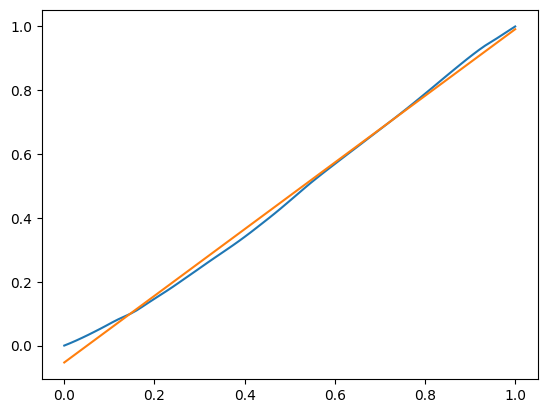

##########
Iteration: 88
Weight: 1.0445674961312168
Bias: -0.05309048111498508
MSE: 0.0003078938053037656
Weight Slope: -0.000258664289267244
Bias Slope: 0.00013868925736624122


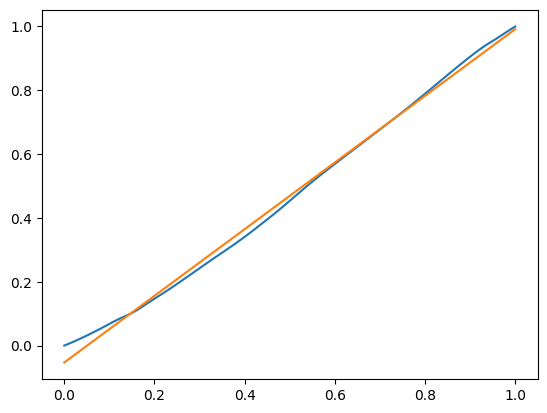

##########
Iteration: 89
Weight: 1.0446968282758504
Bias: -0.0531598257436682
MSE: 0.00030785218730130793
Weight Slope: -0.00024121267866291854
Bias Slope: 0.00012933214463362188


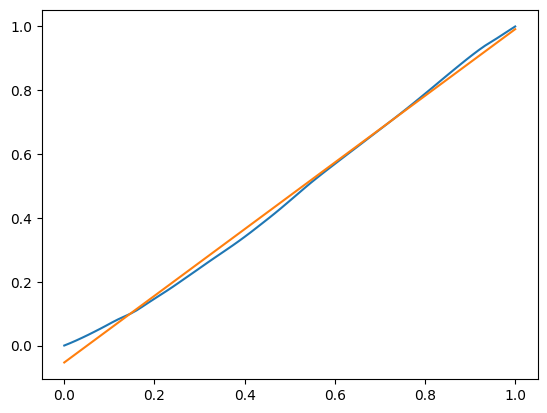

##########
Iteration: 90
Weight: 1.044817434615182
Bias: -0.05322449181598501
MSE: 0.0003078159956378577
Weight Slope: -0.0002249384965838961
Bias Slope: 0.00012060633933154357


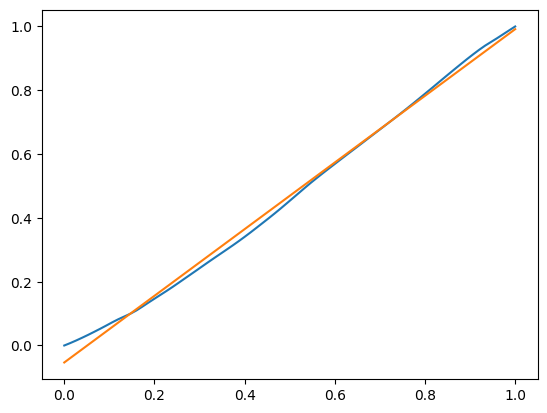

##########
Iteration: 91
Weight: 1.0449299038634738
Bias: -0.05328479498565078
MSE: 0.00030778452280336437
Weight Slope: -0.00020976230406266868
Bias Slope: 0.00011246924829188221


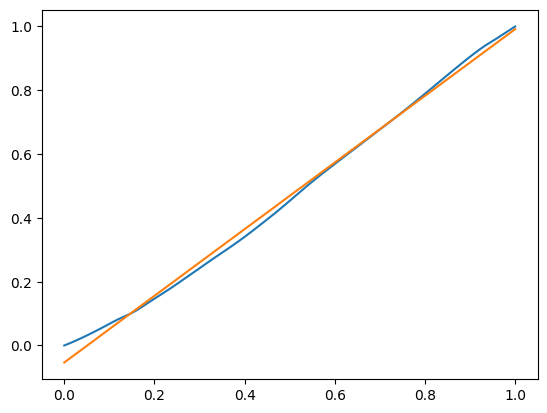

##########
Iteration: 92
Weight: 1.0450347850155053
Bias: -0.05334102960979672
MSE: 0.0003077571535360637
Weight Slope: -0.00019561002173416257
Bias Slope: 0.00010488115203146602


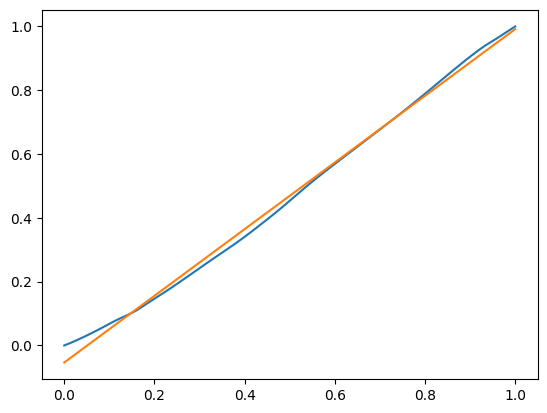

##########
Iteration: 93
Weight: 1.0451325900263724
Bias: -0.053393470185812454
MSE: 0.00030773335279473725
Weight Slope: -0.00018241256823465504
Bias Slope: 9.78050108670753e-05


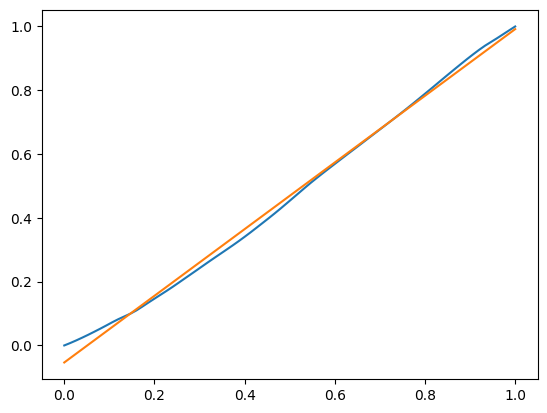

##########
Iteration: 94
Weight: 1.0452237963104898
Bias: -0.05344237269124599
MSE: 0.0003077126552992046
Weight Slope: -0.00017010552299384285
Bias Slope: 9.120628411740515e-05


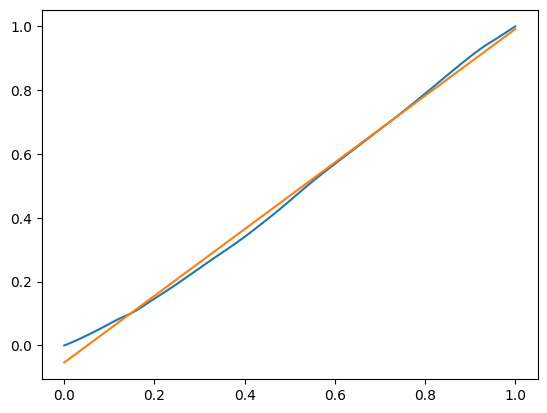

##########
Iteration: 95
Weight: 1.0453088490719866
Bias: -0.053487975833304696
MSE: 0.00030769465643457105
Weight Slope: -0.00015862881178133197
Bias Slope: 8.50527614968487e-05


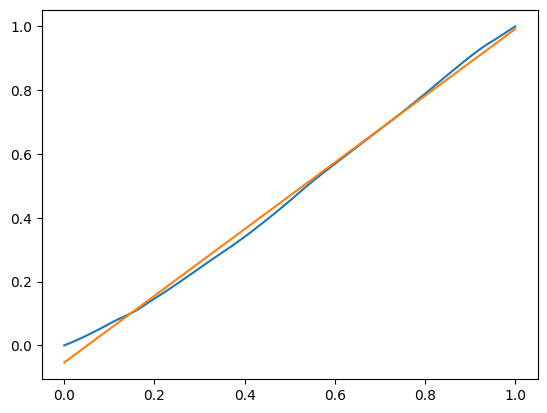

##########
Iteration: 96
Weight: 1.0453881634778772
Bias: -0.05353050221405312
MSE: 0.0003076790043414178
Weight Slope: -0.00014792641346541001
Bias Slope: 7.931440589057399e-05


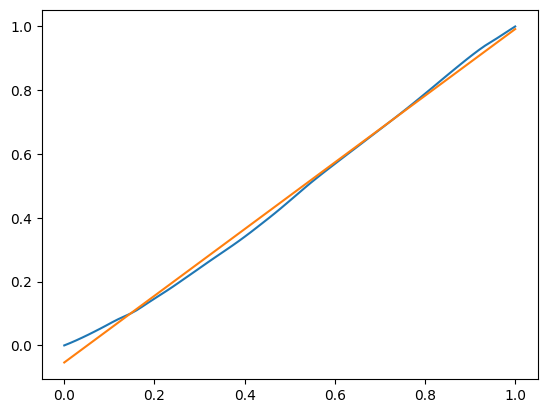

##########
Iteration: 97
Weight: 1.04546212668461
Bias: -0.05357015941699841
MSE: 0.00030766539303731357
Weight Slope: -0.00013794608655889616
Bias Slope: 7.396320673281653e-05


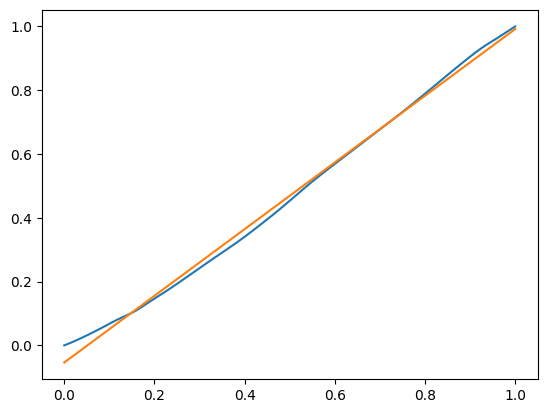

##########
Iteration: 98
Weight: 1.0455310997278895
Bias: -0.05360714102036482
MSE: 0.0003076535564351656
Weight Slope: -0.0001286391142133208
Bias Slope: 6.897304327945162e-05


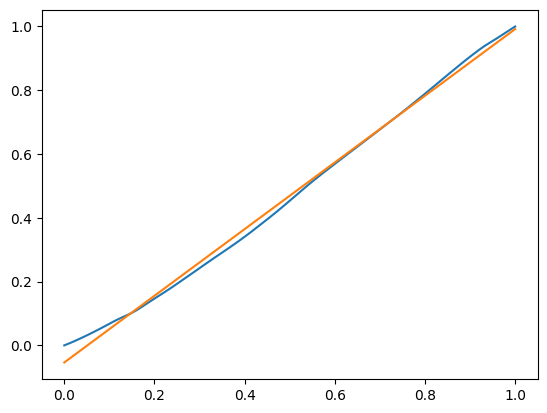

##########
Iteration: 99
Weight: 1.045595419284996
Bias: -0.05364162754200454
MSE: 0.00030764326314149446
Weight Slope: -0.00011996006641703635
Bias Slope: 6.431955710663549e-05


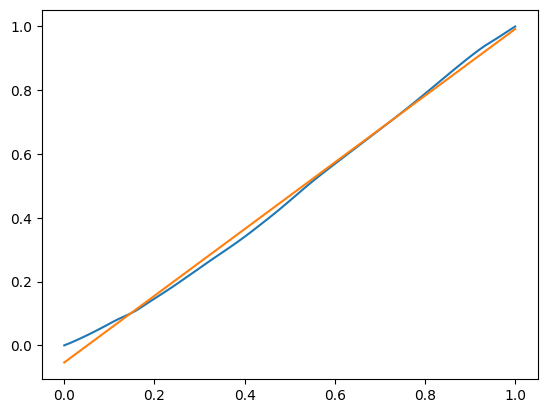

##########
Iteration: 100
Weight: 1.0456553993182047
Bias: -0.05367378732055786
MSE: 0.00030763431193292257
Weight Slope: -0.0001118665782392423
Bias Slope: 5.998003320861025e-05


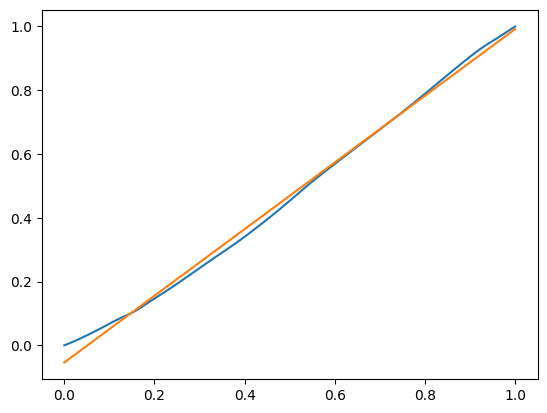

In [ ]:
def train(x,y,lr,epoch):
    bias = 0
    weight = 0

    for o in range(epoch):
        err = 0
        err_weight_slope = 0
        err_bias_slope = 0

        print(f"#"*10)
        print(f"Iteration: {o+1}")
        print(f"Weight: {weight}")
        print(f"Bias: {bias}")

        preds = []

        #forward
        for i in range(x.shape[0]):
            pred = bias + weight * x[i]
            label = y[i]
            preds.append(pred)
            err += pow(pred - label,2)
            err_weight_slope += (pred - label) * 2 * x[i]
            err_bias_slope += (pred - label) * 2

        mse = err / x.shape[0]
        weight_slope = err_weight_slope / x.shape[0]
        bias_slope = err_bias_slope / x.shape[0]

        # backpropagation
        weight = weight - lr * weight_slope
        bias = bias - lr * bias_slope

        print(f"MSE: {mse}")
        print(f"Weight Slope: {weight_slope}")
        print(f"Bias Slope: {bias_slope}")

        plt.plot(x,y)
        plt.plot(x,preds)
        plt.show()

    return weight,bias

w,b = train(rawX,rawY,0.5,100)
plt.show()

After the training done, it's time to test the model wheter it's produce the right value or not. but to test it, you need to encode the X value and decode it back.

In [ ]:
def pred(year):
    nx = scalerX.transform([[year]])
    pred = b + w * nx[0][0]
    # print(pred)
    return round(scalerY.inverse_transform(np.array([[pred]]))[0][0])

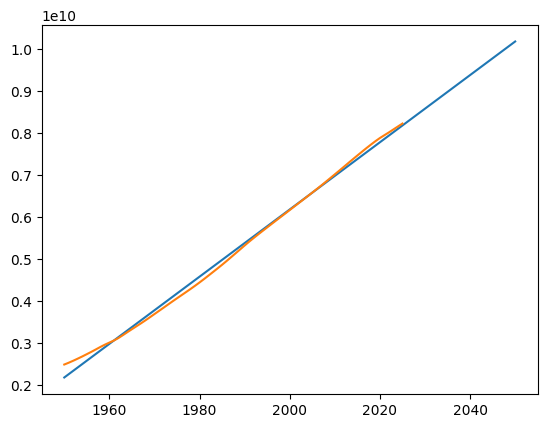

In [ ]:
xt = [i for i in range(1950,2051)]
yt = [pred(i) for i in xt]

plt.plot(xt, yt)
plt.plot(rX, rY)
plt.show()

In [ ]:
for i in range(2025,2051):
    p = pred(i)
    if p >= 10000000000:
        print(f"Year: {i} with {p} population")
        break

Year: 2048 with 10026004524 population


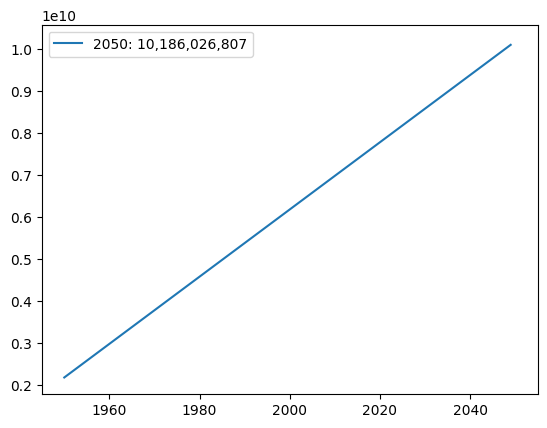

In [ ]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

line, = ax.plot(xt,yt)

def animate(i):
    lbl = f"{xt[i]}: {format(yt[i],',d')}"
    plt.gca().legend((lbl,),loc="upper left")
    line.set_xdata(xt[:i])  # update the data.
    line.set_ydata(yt[:i])  # update the data.
    return line,

ani = animation.FuncAnimation(
    fig, animate, interval=80, blit=True, save_count=len(xt))

# To save the animation, umse e.g.
#
ani.save("graph.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

In [ ]:
format(13482938034,',d')

'13,482,938,034'